In [ ]:


import os, sys
import pathlib
import numpy as np
import pandas as pd
import librosa as lb
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt 




In [ ]:

sys.path.append("../Psychpy/")


In [ ]:


from psychpy.data.data_loader import LoadData



In [ ]:


ld = LoadData(data_dir="../Datasets/psychiatric_disorders_Jan23/")



In [ ]:

p = ld.get_participants_info()
p





In [ ]:

c = ld.get_control_group()
c



In [ ]:
d = ld.get_depression_only()
d


In [ ]:

s = ld.get_schizophrenia_only()
s

In [ ]:
b = ld.get_having_both()
b

In [ ]:
p.shape, d.shape, s.shape, b.shape, c.shape

In [11]:

p1 = ld.get_files_path_of_an_id("PD-050")
p1

[PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-050-pers-1-present.wav'),
 PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-050-instr-1-table.wav'),
 PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-050-pic-1-sportsman.wav')]

In [12]:
stimulus='pers'
for file_path in p1:
    if stimulus in file_path.parts[-1].split("-"):
        break
print(file_path)

../Datasets/psychiatric_disorders_Jan23/wav files/PD-050-pers-1-present.wav


In [13]:


file_path = ld.get_the_file_path_of_the_stimulus(p1, stimulus='pers')
file_path



PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-050-pers-1-present.wav')

In [14]:

# signal, sr = ld.get_an_audio_file(file_path=file_path)




In [15]:


ap, inc = ld.get_all_files_paths_of_a_group_per_stimulus(stimulus='pers', participants_info=d)



PD-039 has missing audio for pers


In [16]:
inc

['PD-039-pers']

In [17]:

ap

[PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-001-pers-1-present.wav'),
 PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-002-pers-1-present.wav'),
 PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-004-pers-1-present.wav'),
 PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-008-pers-1-present.wav'),
 PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-013-pers-1-present.wav'),
 PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-015-pers-1-present.wav'),
 PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-016-pers-1-present.wav'),
 PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-018-pers-1-present.wav'),
 PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-019-pers-1-present.wav'),
 PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-021-pers-1-present.wav'),
 PosixPath('../Datasets/psychiatric_disorders_Jan23/wav files/PD-023-pers-1-present.wav'),

In [18]:
audios, sampling_rates = ld.get_all_audio_files(ap)

In [19]:
len(audios)

95

In [20]:
len(sampling_rates)

95

In [21]:


audios[0].shape



(664576,)

In [22]:


def plot_audio_file(signal, sr, title):
    
    plt.figure(figsize=(20, 5))
    librosa.display.waveshow(signal, sr=sr)
    plt.title('Waveplot ' + title, fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Amplitude', fontdict=dict(size=15))
    plt.show()
    return None




In [ ]:


for audio, sr, t in zip(audios, sampling_rates, ap):
    title = t.parts[-1]
    plot_audio_file(signal=audio, sr=sr, title=title)
    
    

In [ ]:
title = ap[0].parts[-1].split("-")
title

In [ ]:
id_ = "-".join(title[:2])
id_

In [ ]:
ap[0].parts[-1].split("-")


In [ ]:


ap1, inc1 = ld.get_all_files_paths_of_a_group_per_stimulus(stimulus='pers', participants_info=c)


In [ ]:


audios1, sampling_rates1 = ld.get_all_audio_files(ap1)



In [ ]:


for audio, sr, t in zip(audios1, sampling_rates1, ap1):
    title = t.parts[-1]
    plot_audio_file(signal=audio, sr=sr, title=title)
    
    

In [ ]:


audio, sr = lb.load(ap[0], sr=22050)



In [ ]:


audio.shape, sr


In [ ]:
# x = audio
# fs = sr

# onset_frames = lb.onset.onset_detect(y=x, sr=fs, delta=0.04, wait=4)
# onset_frames

In [ ]:


# onset_times = librosa.frames_to_time(onset_frames, sr=fs)
# onset_times



In [ ]:

# onset_samples = librosa.frames_to_samples(onset_frames)
# onset_samples

In [ ]:


means, stds, medians, p_ids =ld.get_1d_voice_features_of_all_audio(audios=audios, s_rates=sampling_rates, paths=ap, extract=True)



In [29]:
means.shape, stds.shape, medians.shape, len(p_ids)

((95, 6), (95, 6), (95, 6), 95)

In [31]:

data = pd.DataFrame(p_ids, columns=["ID"])

data

,ID
0,PD-001
1,PD-002
2,PD-004
3,PD-008
4,PD-013
...,...
90,PN-313
91,PN-316
92,PN-319
93,PN-320


In [105]:

features = [
    "spectral_centroid", "spectral_bandwidth", "spectral_rolloff", 
    "spectral_flatness", "zero_crossing_rate", "rms",
]


for f in range(len(features)):
    data.insert(loc=f+1, column=features[f]+"-ave", value=means[:, f], allow_duplicates=True)
    data.insert(loc=f+1, column=features[f]+"-std", value=stds[:, f], allow_duplicates=True)
    data.insert(loc=f+1, column=features[f]+"-med", value=medians[:, f], allow_duplicates=True)
    
    
data
    

,ID,spectral_centroid-med,spectral_bandwidth-med,spectral_rolloff-med,spectral_flatness-med,zero_crossing_rate-med,rms-med,rms-std,rms-ave,zero_crossing_rate-std,zero_crossing_rate-ave,spectral_flatness-std,spectral_flatness-ave,spectral_rolloff-std,spectral_rolloff-ave,spectral_bandwidth-std,spectral_bandwidth-ave,spectral_centroid-std,spectral_centroid-ave
0,PD-001,1474.682860,1914.935027,3133.081055,0.001538,0.054199,0.023922,0.028004,0.029633,0.107247,0.096246,0.028712,0.012954,2132.326018,3721.431487,524.163596,1999.720711,1284.793855,1947.418196
1,PD-002,1062.676809,1630.846510,1943.371582,0.000328,0.042480,0.042795,0.030741,0.043930,0.092409,0.077850,0.014325,0.005060,2216.910836,2756.566904,560.461824,1724.751043,1242.350784,1544.492833
2,PD-004,1642.432831,1998.863529,3423.779297,0.003412,0.066895,0.079310,0.051441,0.084811,0.076477,0.092979,0.026314,0.014097,1814.158703,3878.633705,490.945017,2048.374306,1040.731579,1974.409667
3,PD-008,987.541291,1617.726578,1711.889648,0.000293,0.034180,0.089561,0.074947,0.103382,0.052871,0.049243,0.011628,0.003475,2107.129055,2520.711331,635.950570,1728.697352,981.467911,1330.017669
4,PD-013,1822.308695,1840.123505,4726.538086,0.000123,0.074707,0.065510,0.044084,0.068410,0.146207,0.149233,0.001778,0.000780,2082.970350,4190.987909,453.474855,1837.030745,1468.910066,2322.996715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,PN-313,898.488003,894.106418,1550.390625,0.000027,0.054199,0.081611,0.079787,0.100036,0.058625,0.073153,0.005505,0.000998,1393.462967,1914.880624,539.857564,1053.380739,740.295201,1139.537942
91,PN-316,1398.694811,1414.222700,2637.817383,0.000222,0.070801,0.105446,0.100787,0.121755,0.076075,0.104063,0.015329,0.005746,1895.916995,2979.500187,597.562591,1554.375133,991.222590,1715.289782
92,PN-319,1286.166482,1903.173784,2465.551758,0.000731,0.051270,0.033711,0.038225,0.040456,0.086958,0.082350,0.016333,0.008895,2197.500629,3247.083261,548.782581,1935.052610,1066.291744,1688.898895
93,PN-320,2271.354778,2477.360017,5286.401367,0.008630,0.087646,0.058306,0.055961,0.069909,0.103595,0.123260,0.036684,0.027371,2133.218266,4976.126259,455.631830,2434.363309,1260.054572,2478.808964


In [ ]:



# F = ["A", "B", "C", "D"]
# stats = ["Mean", "std", "Median"]

# d = pd.DataFrame(i, columns=["ID"] )

# for f in range(len(F)):
# #     d[f] = m_[:, f]
#     d.insert(loc=f+1, column=F[f]+"m", value=m_[:, f], allow_duplicates=True)
#     d.insert(loc=f+1, column=F[f]+"s", value=s_[:, f], allow_duplicates=True)

    
# d  


# Windowing/framing/fragmentation


- windowing (framing/fragmentatiom, etc) extracts segments which are short enough that the properties of the speech signal are more or less stationary within that segment: Thus mathematical tools like FFT etc will be applicable.  

- In librosa, if one leaves the **'win_length'** option unspecified, it will be set to win_length = n_fft. (sometimes called as frame length etc.)
        
- where hop_length is the length of the non-intersecting portion of window length, (number of samples in a window of a sample.
    
- Read more: https://wiki.aalto.fi/display/ITSP/Windowing

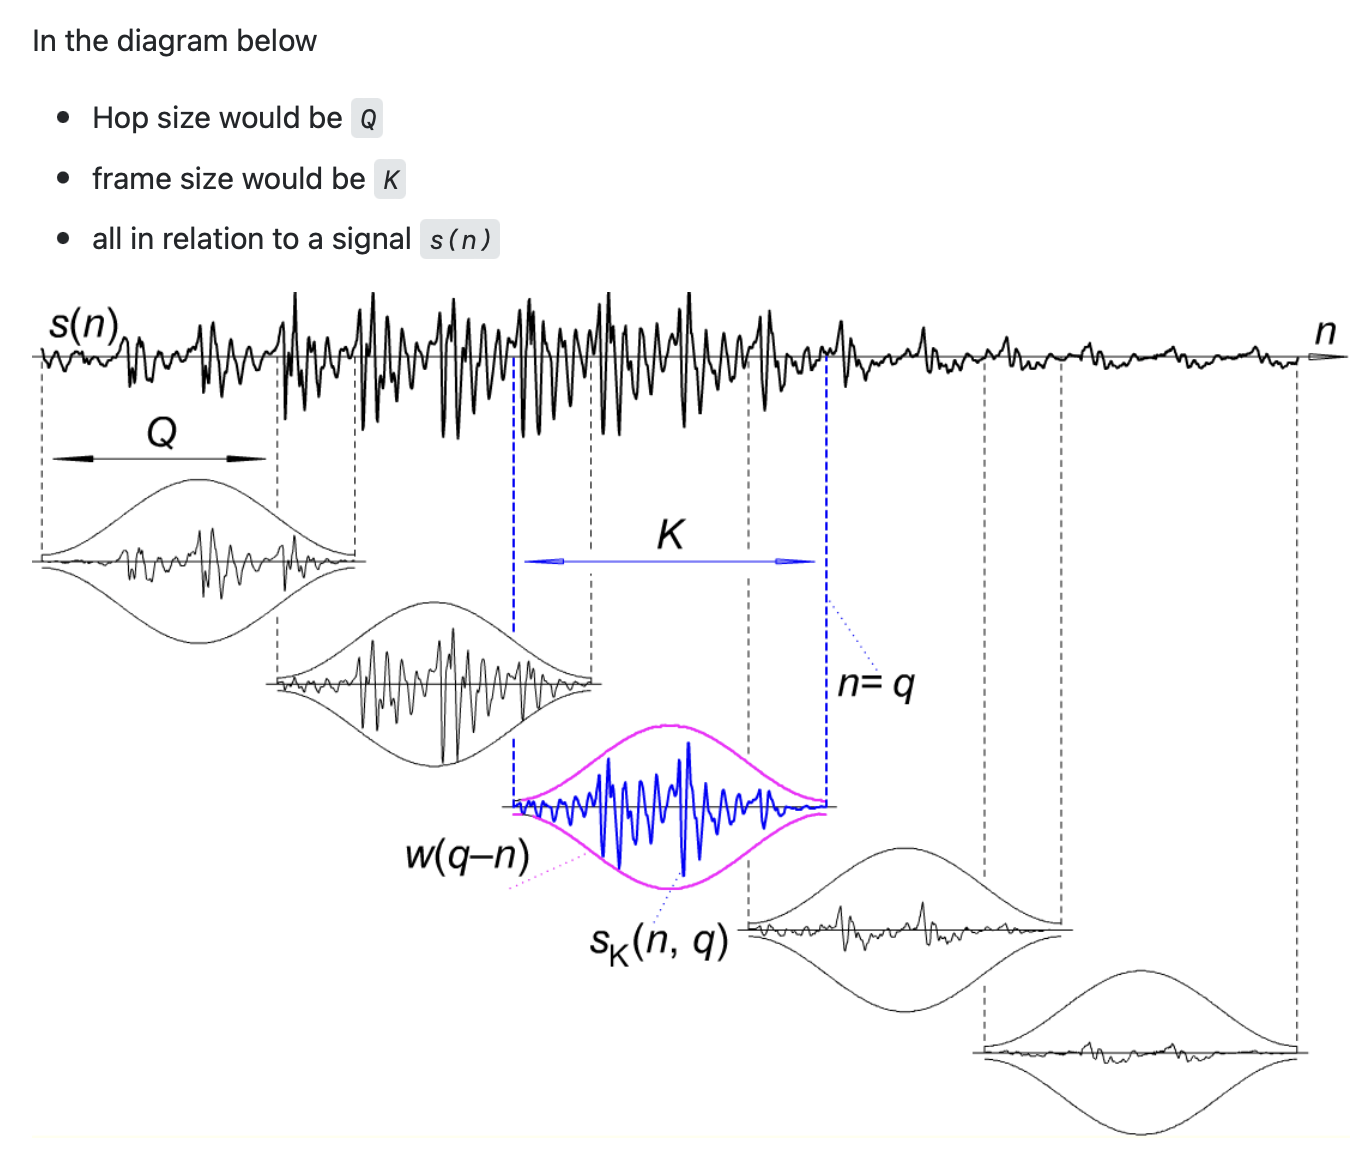


  
Image Ref: https://stackoverflow.com/questions/51276464/hop-size-meaning-in-aubio





### Terminologies:

- A pitch class is a set of all pitches that are a whole number of octaves apart; for example, the pitch class C consists of the Cs in all octaves. " The pitch class C stands for all possible Cs, in whatever octave position."

- octave, in music, an interval whose higher note has a sound-wave frequency of vibration twice that of its lower note. (An octave is a series of eight notes in a musical scale.)

- pitch class:= denote chroma; pitch classes are ({C, C#, D, D#, E, ..., B}).

- octave number := tone height; an interval whose higher note has a sound-wave frequency of vibration twice that of its lower note.


- len(audio/signal) := lenght in second * sampling rate




   
# 1-Dimensional features

### Spectral centroid

- Spectral centroid is the weighted mean of the frequencies present in the signal, determined using a Fourier transform, with their magnitudes as the weights.
More precisely: 

$$ f_c = \frac{\sum_k x(k) f(k)}{\sum_k x(k)}.$$

where $x(k)$ is the spectral magnitude at frequency bin $k$ (or weighted frequency value), $f(k)$ is the frequency at bin $k$.

<!-- let $x(n)$ represents the weighted frequency value, or magnitude, of bin number $n$, and $f(n)$ represents the centre frequency of that bin, thus spectral centroid is:

$${\mathrm {Centroid} ={\frac {\sum _{n=0}^{N-1}f(n)x(n)}{\sum _{n=0}^{N-1}x(n)}}}.$$
 -->
    
- The spectral centroid is a good predictor of the "brightness" of a sound. In other words, it is an automatic measure of musical timbre (the colour of the sound).
    
   - **output shape: (1, len(audio)/hop_length).**
     


### Spectral bandwidth

- Spectral bandwidth or spectral spread is the spectral range of interest around the centroid, that is, the variance from the spectral centroid.

    
$$ (\sum_k x(k)(f(k) - f_c)^p)^{\frac{1}{p}}.$$

- where $x(k)$ is the spectral magnitude at frequency bin $k$, $f(k)$ is the frequency at bin $k$, and $f_c$ is the spectral centroid. When $p = 2$, this is like a weighted standard deviation.

    - **output shape: (1, len(audio)/hop_length).**



- **Spectral roll off** is the frequency below which a specified percentage, e.g. 85%,  of the total spectral energy lies. 

    - **output shape: (1, len(audio)/hop_length).**
    
    

    
- **Spectral flatness** also known as tonality coefficient or Wiener entropy, measured in decibels, characterizes an audio spectrum such that it quantifies how much a sound resembles a pure tone, as opposed to being noise-like.

    - **output shape: (1, len(audio)/hop_length).**




- **zero crossing rate (ZCR)** is the rate at which an audio signal transitions from negative to zero to positive or vice-versa.

    - **output shape: (1, len(audio)/hop_length).**
    
    





# 2-Dimensional features (or 3-D)



- **Spectral contrast** is defined (in the decibel) as the difference between peaks and valleys of each frequency sub-band. For more information refer to [3]. (OCTAVE-BASED SPECTRAL CONTRAST REPRESENTATION).

    - High contrast values generally correspond to clear, narrow-band signals, while low contrast values correspond to broad-band noise.
    
    - **output shape: (7, len(audio)/hop_length).** Where 7 is the number of sub-bands. 
    - sub-bands, which are 0hz~200hz, 200hz~400hz, 400hz~ 800hz, 800hz~1600hz, 1600hz~3200hz, and 3200hz~8000hz (the sample rate is 16khz)
    
    
- **MFCC feature extraction** technique basically includes windowing the signal, applying the DFT, taking the log of the magnitude, and then warping the frequencies on a Mel scale, followed by applying the inverse DCT (Discrete cosine transform). The detailed description of various steps involved in the MFCC feature extraction is explained in [2].
    
    - **output shape: (n_mfcc, len(audio)/hop_length).**  n_mfcc is the number of MFCC features.
    - More investigation is required on each MFCC features, for instance, the first features, i.e, $c_0$  is the average log-energy of the input signal, Etc.


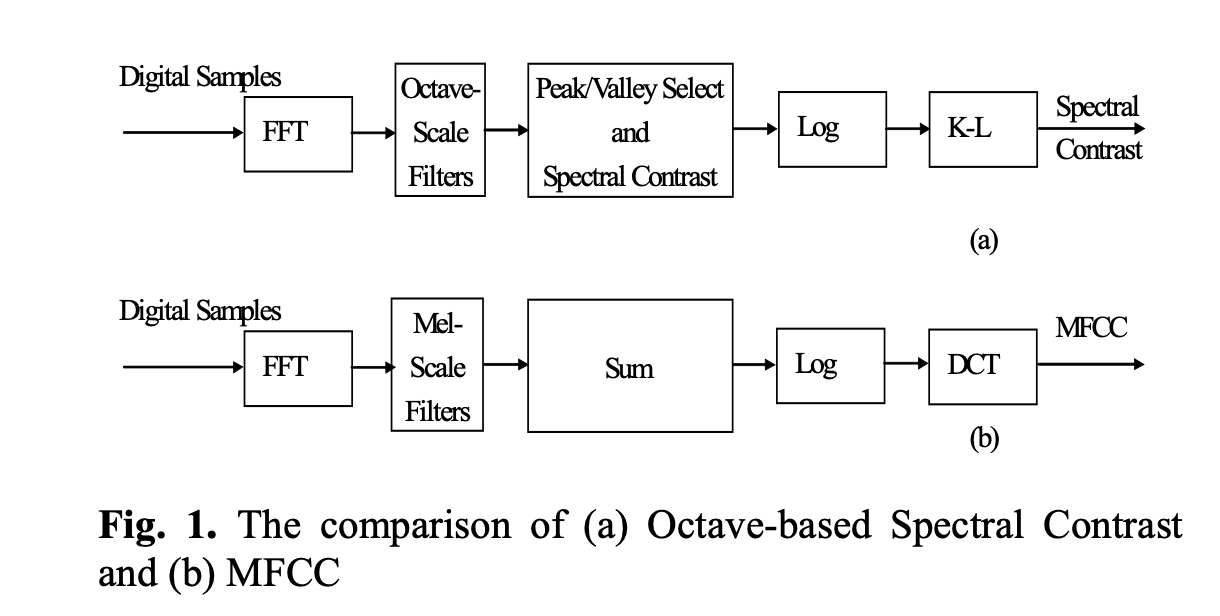


Image Ref. [3].

    
    
    
### **Chromagram** 

- Chromagram extends the concept of chroma to include the dimension of time. It is a set of 12-element vectors representing the short-time energy distribution of an (audio) signal [1]. It represents the intensity of the twelve distinctive pitch classes ({C, C#, D, D#, E, ..., B}) that are used to study music. The chromavector is computed by grouping the discrete Fourier transform(DFT) coefficients of a short-term window into 12 bins.

    - The 12 elements of the vector are equivalent to twelve pitches of the qual-tempered chromatic scale.

   - **output shape: (12, len(audio)/hop_length).**
   
   
   - **More mathematical details:**
 
       - Chroma spectrum $S(c)$ measures the signal's strength for a given value of chroma.
       
       - The chromagram, $s(t,c)$, is a joint distribution of signal strength over the variables time and chroma.
       
       - In the very basif form, chromagram, as be considered as a re-mapping of time-frequency image, such as spegtogram Etc, through some aggregation function $G$, e.g.,: 
       $$ s(t, c) = G(s(t, f); \forall f = 2^{c+h})$$
       
       - where $c$ and $h$ respectively represent, the chroma (angle along spiral) and tone height in Paterson's lag variables. And the suficient condition for this decomposition are (i)$c$ should be unique scalar in $[0, 1)$ (ii) and $h\in Z$. 
       
       - For more details refer to [1].
       
       - librosa.feature.tonnetz is derivative of this item.
 
<!--        - Chromagram is invariant to octave translation. -->



<!-- ![helix.png](attachment:helix.png) -->


    
    
### **Spectrograms**

- Spectrograms is the squared magnitude of the short-time Fourier transform (STFT) of the signal $s(t)$, i.e., for a window width $w$, the spectrogram  $s(t, w) = |STFT(t, w)|^2$.

- It infers properties about the distribution of a signal's energy over frequency and time.
- I prefer to use mel-scaled spectrogram, 
    
    - **output shape:(n_mels, len(audio)/hop_length)** n_mels:= frequency resolution




### Chromogram vs Spegtogram:


- The chromagram $s(t,c)$ extends the concept of chroma to include the dimension of time. The spectrogram $s(t,f)$ is to infer properties about the distribution of a signal's energy over frequency and time, the chromagram can be used to infer properties about the distribution of a signal's energy over chroma and time. 
    




[1] Wakefield, G.H., 1999, November. Mathematical representation of joint time-chroma distributions. In Advanced Signal Processing Algorithms, Architectures, and Implementations IX (Vol. 3807, pp. 637-645). SPIE.


[2] https://link.springer.com/content/pdf/bbm:978-3-319-49220-9/1.pdf



[3] Jiang, Dan-Ning, Lie Lu, Hong-Jiang Zhang, Jian-Hua Tao, and Lian-Hong Cai. “Music type classification by spectral contrast feature.” In Multimedia and Expo, 2002. ICME‘02. Proceedings. 2002 IEEE International Conference on, vol. 1, pp. 113-116. IEEE, 2002.
  
  
[4] Dennis, J., Tran, H.D. and Li, H., 2010. Spectrogram image feature for sound event classification in mismatched conditions. IEEE signal processing letters, 18(2), pp.130-133.
  
- Relatively useful website: https://musicinformationretrieval.com/







In [ ]:


features_fn_i = [
    lb.feature.spectral_centroid, 
    lb.feature.spectral_bandwidth,
    lb.feature.spectral_rolloff,
    # lb.feature.tempogram,  # (384, 1299)
    # lb.feature.tonnetz,  # (6, 1299)
]

for fn in features_fn_i:
    print(f"features:{fn} {fn(y=audio, sr=sr).shape}")


In [ ]:


features_fn_ii = [
   
    lb.feature.zero_crossing_rate,
    lb.feature.spectral_flatness,
    lb.feature.rms,

]


for fn in features_fn_ii:
    print(f"features:{fn} {fn(y=audio,).shape}")
    
    

In [ ]:


features_fn_iii = [    
    lb.feature.spectral_contrast,
    lb.feature.chroma_stft,
    lb.feature.mfcc,
    lb.feature.melspectrogram,

]

for fn in features_fn_iii:
    print(f"features:{fn} {fn(y=audio, sr=sr).shape}")


In [ ]:
int(len(audio)/512)

In [ ]:


for i in [10, 12, 20, 18]:
    
    f = lb.feature.melspectrogram(y=audios[i], sr=sr)
    print("features:", f.shape)





### play an audio file for fun ;)

In [ ]:


ipd.Audio(audio, rate=sr)



In [78]:



m = [[10, 20, 30, 40], [10.1, 20.1, 30.1, 40.1], [10.2, 20.2, 30.2, 40.2], [10.3, 20.3, 30.3, 40.3]]
s = [[1, 2, 3, 4], [1.1, 2.1, 3.1, 4.1], [1.2, 2.2, 3.2, 4.2], [1.3, 2.3, 3.3, 4.3]]
i = ["PD1", "PD2", "PD3", "PD4"]




In [79]:
m

[[10, 20, 30, 40],
 [10.1, 20.1, 30.1, 40.1],
 [10.2, 20.2, 30.2, 40.2],
 [10.3, 20.3, 30.3, 40.3]]

In [80]:
m_ = np.asarray(m)
m_



array([[10. , 20. , 30. , 40. ],
       [10.1, 20.1, 30.1, 40.1],
       [10.2, 20.2, 30.2, 40.2],
       [10.3, 20.3, 30.3, 40.3]])

In [82]:
s_ = np.asarray(s)
s_



array([[1. , 2. , 3. , 4. ],
       [1.1, 2.1, 3.1, 4.1],
       [1.2, 2.2, 3.2, 4.2],
       [1.3, 2.3, 3.3, 4.3]])

In [102]:

F = ["A", "B", "C", "D"]
stats = ["Mean", "std", "Median"]

d = pd.DataFrame(i, columns=["ID"] )

for f in range(len(F)):
#     d[f] = m_[:, f]
    d.insert(loc=f+1, column=F[f]+"m", value=m_[:, f], allow_duplicates=True)
    d.insert(loc=f+1, column=F[f]+"s", value=s_[:, f], allow_duplicates=True)

    
d  

,ID,As,Bs,Cs,Ds,Dm,Cm,Bm,Am
0,PD1,1.0,2.0,3.0,4.0,40.0,30.0,20.0,10.0
1,PD2,1.1,2.1,3.1,4.1,40.1,30.1,20.1,10.1
2,PD3,1.2,2.2,3.2,4.2,40.2,30.2,20.2,10.2
3,PD4,1.3,2.3,3.3,4.3,40.3,30.3,20.3,10.3


,ID,As,Bs,Cs,Ds,Dm,Cm,Bm,Am
0,PD1,1.0,2.0,3.0,4.0,40.0,30.0,20.0,10.0
1,PD2,1.1,2.1,3.1,4.1,40.1,30.1,20.1,10.1
2,PD3,1.2,2.2,3.2,4.2,40.2,30.2,20.2,10.2
3,PD4,1.3,2.3,3.3,4.3,40.3,30.3,20.3,10.3
